In [1]:
###Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
!pip install imblearn
import pandas as pd
import seaborn as sns

In [3]:
###1.Load the dataset and explore the variables.

In [4]:
data = pd.read_csv('customer_churn.csv',sep=",")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['SeniorCitizen'].value_counts()  ### From this alone we can clearly see that 'Senior Citizen' is a categorical variable, which implies SMOTE-NC can be used

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
###2.We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
###Data proportions

In [10]:
5174/(5174+1869)

0.7346301292063041

In [11]:
###3.Extract the target variable
###4.Extract the independent variables and scale them.
###5.Build the logistic regression model.
###6.Tenure, Senior Citizen and Monthly Charges are numerical variables


In [12]:
numericData = data[['tenure', 'SeniorCitizen','MonthlyCharges']] #independent variables
transformer = StandardScaler().fit(data[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(data[['tenure','SeniorCitizen','MonthlyCharges']])

y = pd.DataFrame(data=data, columns=['Churn']) #target variable/dependent variable


X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7808802650260294

In [13]:
###6.Evaluate the model.
###ANSWER:Despite the disproportionate lack of 'No'responses, the model still has an accuracy score of 78%. In this context, the accuracy is not the best metric due to the extreme data imbalance.
###using the classification report. As you can see under 'precision', the model is indeed slightly better at predicting No than
### predicting Yes.

In [14]:
from sklearn.metrics import classification_report #library

In [15]:
print(classification_report(y_test, classification.predict(X_test)))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1547
         Yes       0.62      0.46      0.53       566

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [16]:
###7.Even a simple model will give us more than 70% accuracy. Why?

###ANSWER:Due to the intrinsic imbalance of the data, the model has been become very good in predicting 'No' instead of 'Yes'. Interestingly,
###the accuracy score roughly corresponds to the proportion of 'No's in the Churn data. In the case of imbalanced data, it may be more useful to look at the F1 scores instead,
### which is a balance between the Precision and Recall score (more below). From the above, we can observe that the F1Score for Yes (0.53) is average at best.

In [18]:
###6.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
###Apply imblearn.over_sampling.SMOTE to the dataset. 
###Build and evaluate the logistic regression model. Is it there any improvement?

In [19]:
from imblearn.over_sampling import SMOTE #imported SMOTE library
!pip install imbalanced-learn 

In [20]:
###Default SMOTE (Only works well with continuous data)

In [21]:
smote = SMOTE() #with SMOTE(), both yes and no responses are in equal amounte, the minority is oversampled
X =data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
transformer = StandardScaler().fit(X)
X= transformer.transform(X)
y=data['Churn']
X_sm, y_sm= smote.fit_resample(X, y)
y_sm.value_counts()


No     5174
Yes    5174
Name: Churn, dtype: int64

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions= classification.predict(X_test)
classification.score(X_test, y_test)

0.7384863123993559

In [23]:
print(classification_report(y_test, classification.predict(X_test))) #precision: ratio of true positives to the sum of true and false positives
#recall:ratio of true positives to the sum of true positives and false negatives


              precision    recall  f1-score   support

          No       0.74      0.74      0.74      1557
         Yes       0.74      0.73      0.74      1548

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



In [24]:
from matplotlib import pyplot #libraries
from numpy import where
from collections import Counter

In [25]:
counter2= Counter(y_sm) #function produced for scatterplot
print(counter2)

Counter({'No': 5174, 'Yes': 5174})


In [26]:
### The below is a scatterplot of the transformed dataset, showing the oversampled minority (Yes) and undersampled majority (No)

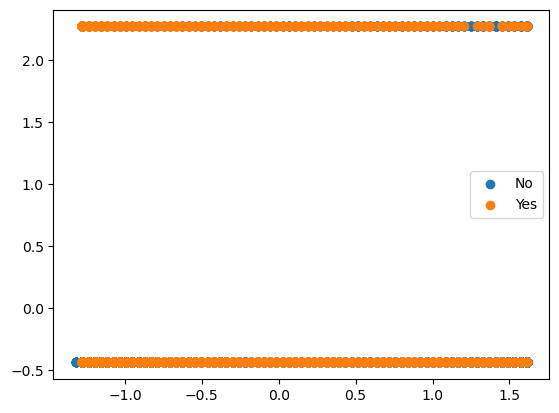

In [27]:
for label, _ in counter2.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [28]:
###The accuracy score does not show any major improvement, because the score is agglomeration of the model's accuracy in both predicting Yes and No.
###In the context of the previous model, the accuracy score mainly reflects its preformance in predicting No. We could perhaps 
### try Borderline SMOTE, which is another variation of SMOTE (oversampling), and SMOTE NC, which works on both categorical and continuous data.

In [29]:
###Borderline SMOTE: Unlike SMOTE, where synthetic data is randomly created between two data points, Borderline SMOTE produces synthetic
###data along the decision boundary between two classes

In [30]:
from imblearn.over_sampling import BorderlineSMOTE #library

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [32]:
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

In [33]:
classifier_border = LogisticRegression()
classifier_border.fit(X_oversample_borderline, y_oversample_borderline)
print(classification_report(y_test, classifier_border.predict(X_test)))

              precision    recall  f1-score   support

          No       0.74      0.75      0.74      1557
         Yes       0.74      0.73      0.74      1548

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



In [34]:
###SMOTE-NC : Works better with a dataset that has both categorical and continuous features

In [35]:
from imblearn.over_sampling import SMOTENC

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [37]:
###With SMOTE-NC, we need to indicate precisely where the categorical column is, and in this case [2] ('SeniorCitizen')

In [38]:
smotenc = SMOTENC([2],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [39]:
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

          No       0.74      0.74      0.74      1557
         Yes       0.74      0.73      0.74      1548

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



In [40]:
### As you can see from the above, all 3 SMOTE models produce similar results, with the Borderline SMOTE being marginally at recall better that other SMOTE variations
### In other words, the Borderline SMOTE is better at idenitfying all actual positives out of all the positives (true and false) that exist within the dataset. However, the SMOTe models
### have better F1 scores across the board.

In [41]:
###Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class 
###of each pair increases the space between the two classes, facilitating the classification process. 
###Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. 
###Is it there any improvement?

In [42]:
from imblearn.under_sampling import TomekLinks #library

In [43]:
tl= TomekLinks(sampling_strategy='majority')
X_tl, y_tl= tl.fit_resample(X, y)
y_tl.value_counts()

No     4697
Yes    1869
Name: Churn, dtype: int64

In [44]:
X_tl2, y_tl2 =tl.fit_resample(X_tl, y_tl)
y_tl2.value_counts()

No     4544
Yes    1869
Name: Churn, dtype: int64

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X_tl, y_tl, test_size= 0.3, random_state=100)
classification=LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions= classification.predict(X_test)

classification.score(X_test, y_test)


0.8040609137055837

In [47]:
print(classification_report(y_test, classification.predict(X_test)))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1397
         Yes       0.73      0.52      0.61       573

    accuracy                           0.80      1970
   macro avg       0.78      0.72      0.74      1970
weighted avg       0.80      0.80      0.79      1970



In [ ]:
### Great accuracy, but the recall(0.52) and F1 scores (0.61) have not improved. In other words, the Tomeklinks model has difficulty distinguishing true positives. As mentioned previously, the accuracy score is not as useful for classifications involving
###imbalanced data, especially in this context where the ratio of Yes and No is 1:3. Based on this alone, I would recommend the SMOTE_NC. I suspect the Tomeklinks didn't work as well as expected because there is sufficient distance between the two classes (refer to above scatterplot).
